# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Najwar Putra Kusumah Wardana
- **Email:** najwar1105@gmail.com
- **ID Dicoding:** MC009D5Y2173

## Pertanyaan Bisnis

- Produk apa yang paling sering dibeli pelanggan?
- Apakah ada pola pembayaran tertentu yang lebih sering digunakan pelanggan?
- Bagaimana tren penjualan dari waktu ke waktu?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

#### Membaca dan menampilkan data basic yang berada dalam E-Commerce Public Dataset

In [2]:
# Memuat Datasets
file_paths = {
    "customers": "data/customers_dataset.csv",
    "geolocation": "data/geolocation_dataset.csv",
    "order_items": "data/order_items_dataset.csv",
    "order_payments": "data/order_payments_dataset.csv",
    "order_reviews": "data/order_reviews_dataset.csv",
    "orders": "data/orders_dataset.csv",
    "product_category": "data/product_category_name_translation.csv",
    "products": "data/products_dataset.csv",
    "sellers": "data/sellers_dataset.csv",
}

# Membaca datasets
datasets = {name: pd.read_csv(path) for name, path in file_paths.items()}

# Menampilkan basic data yang ada pada datasets
data_info = {name: df.info() for name, df in datasets.items()}
data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  

{'customers': None,
 'geolocation': None,
 'order_items': None,
 'order_payments': None,
 'order_reviews': None,
 'orders': None,
 'product_category': None,
 'products': None,
 'sellers': None}

**Insight:**
- Sebagian besar dataset tidak memiliki missing values, kecuali pada order_reviews, orders, dan products.
- Dataset order_payments bisa digunakan untuk analisis metode pembayaran yang paling populer.
- Dataset order_items berguna untuk melihat produk yang paling sering dibeli.


### Assessing Data

#### Mencari Missing Values pada *datasets*

In [3]:
missing_values = {name: df.isnull().sum() for name, df in datasets.items()}
missing_values

{'customers': customer_id                 0
 customer_unique_id          0
 customer_zip_code_prefix    0
 customer_city               0
 customer_state              0
 dtype: int64,
 'geolocation': geolocation_zip_code_prefix    0
 geolocation_lat                0
 geolocation_lng                0
 geolocation_city               0
 geolocation_state              0
 dtype: int64,
 'order_items': order_id               0
 order_item_id          0
 product_id             0
 seller_id              0
 shipping_limit_date    0
 price                  0
 freight_value          0
 dtype: int64,
 'order_payments': order_id                0
 payment_sequential      0
 payment_type            0
 payment_installments    0
 payment_value           0
 dtype: int64,
 'order_reviews': review_id                      0
 order_id                       0
 review_score                   0
 review_comment_title       87656
 review_comment_message     58247
 review_creation_date           0
 review_answer_t

#### Mencari Duplikasi data pada *datasets*

In [4]:
duplicates = {name: df.duplicated().sum() for name, df in datasets.items()}
duplicates

{'customers': np.int64(0),
 'geolocation': np.int64(261831),
 'order_items': np.int64(0),
 'order_payments': np.int64(0),
 'order_reviews': np.int64(0),
 'orders': np.int64(0),
 'product_category': np.int64(0),
 'products': np.int64(0),
 'sellers': np.int64(0)}

In [5]:
data_types = {name: df.dtypes for name, df in datasets.items()}
data_types

{'customers': customer_id                 object
 customer_unique_id          object
 customer_zip_code_prefix     int64
 customer_city               object
 customer_state              object
 dtype: object,
 'geolocation': geolocation_zip_code_prefix      int64
 geolocation_lat                float64
 geolocation_lng                float64
 geolocation_city                object
 geolocation_state               object
 dtype: object,
 'order_items': order_id                object
 order_item_id            int64
 product_id              object
 seller_id               object
 shipping_limit_date     object
 price                  float64
 freight_value          float64
 dtype: object,
 'order_payments': order_id                 object
 payment_sequential        int64
 payment_type             object
 payment_installments      int64
 payment_value           float64
 dtype: object,
 'order_reviews': review_id                  object
 order_id                   object
 review_score      

**Insight:**
#### Missing Value
- No cleaning/tidak perlu tindakan:
    - customers → Semua data lengkap.
    - geolocation → Tidak ada data yang hilang.
    - order_items → Data pesanan lengkap.
    - order_payments → Semua transaksi pembayaran tersedia.
    - product_category → Tidak ada data yang hilang.
    - sellers → Data penjual lengkap.
<br> </br>
- Perlu tindakan:
  - order_reviews
    - review_comment_title → 87.656 data kosong.
    - review_comment_message → 58.247 data kosong.
      ##### Penyebab: Tidak semua pelanggan memberikan komentar saat memberikan ulasan.
  - orders
    - order_delivered_carrier_date → 1.783 data kosong
    - order_delivered_customer_date → 2.965 data kosong
      ##### Penyebab: Pesanan yang belum diproses dan Data yang tidak tercatat
  - products
    - product_category_name, product_name_lenght, product_description_lenght, product_photos_qty → 610 data kosong.
    - product_weight_g, product_length_cm, product_height_cm, product_width_cm → 2 data kosong.
      ##### Penyebab: Beberapa produk mungkin tidak memiliki kategori yang tercatat dan atau ada produk dengan informasi deskripsi yang hilang.

#### Duplicates
- No cleaning/tidak perlu tindakan:
  - customers → Tidak ada data duplikat.
  - order_items → Data pesanan unik.
  - order_payments → Data pembayaran unik.
  - order_reviews → Tidak ada duplikasi review.
  - orders → Setiap pesanan unik.
  - product_category → Tidak ada kategori produk yang berulang.
  - products → Setiap produk unik.
  - sellers → Setiap penjual tercatat satu kali.
<br> </br>
- Perlu tindakan
  - geolocation → 261.831 Data Duplikat.
    ##### Kemungkinan berisi koordinat geografis yang berulang, karena beberapa kode pos bisa memiliki banyak entri dengan lokasi yang sama.

#### Inaccurate Values
- Perlu Tindakan
  - orders
    - *order_purchase_timestamp*, *order_approved_at*, *order_delivered_carrier_date* *order_delivered_customer_date*,*order_estimated_delivery_date* → Seharusnya datetime, bukan object.
  - order_item
    - *shipping_limit_date* → Seharusnya datetime, bukan object.
  - order_review
    - *review_creation_date*, *review_answer_timestamp* → Seharusnya datetime, bukan object.

### Cleaning Data

#### Membersihkan missing value pada *datasets*

- ##### order_reviews

In [6]:
datasets["order_reviews"].loc[:, "review_comment_title"] = datasets["order_reviews"]["review_comment_title"].fillna("")
datasets["order_reviews"].loc[:, "review_comment_message"] = datasets["order_reviews"]["review_comment_message"].fillna("")

- ##### orders

In [7]:
#Membuat kolom baru (order_status_clean) untuk menandai pesanan yang hilang.
datasets["orders"]["order_status_clean"] = datasets["orders"]["order_delivered_customer_date"].isnull().map({True: "Belum Selesai", False: "Selesai"})

- ##### products

In [8]:
#Untuk kategori kosong
datasets["products"]["product_category_name"].fillna("unknown", inplace=True)

/var/folders/mf/d68wp8695t52xvrgzxzcwlb40000gn/T/ipykernel_1935/2428040025.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  datasets["products"]["product_category_name"].fillna("unknown", inplace=True)


In [9]:
#Untuk dimensi dan berat yang kosong
datasets["products"].fillna(datasets["products"].median(numeric_only=True), inplace=True)

#### Membersihkan data duplicate pada *datasets*

- ##### geolocation

In [10]:
#Menghitung jumlah kemunculan tiap koordinat
datasets["geolocation"].groupby(["geolocation_zip_code_prefix", "geolocation_lat", "geolocation_lng"]).size()

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng
1001                         -23.551427       -46.634074         1
                             -23.551337       -46.634027         3
                             -23.550642       -46.634410         1
                             -23.550498       -46.634338         8
                             -23.550263       -46.634196         1
                                                                ..
99980                        -28.386612       -51.846889         1
                             -28.386408       -51.844876         1
                             -28.386239       -51.847741         1
99990                        -28.329718       -51.769615         1
                             -28.329472       -51.769109         1
Length: 720154, dtype: int64

In [11]:
#Menghapus duplikat total
datasets["geolocation"] = datasets["geolocation"].drop_duplicates()

#### Membersihkan inaccurate values pada *datasets*

- ##### order_reviews

In [12]:
datasets["order_reviews"]["review_creation_date"] = pd.to_datetime(datasets["order_reviews"]["review_creation_date"])
datasets["order_reviews"]["review_answer_timestamp"] = pd.to_datetime(datasets["order_reviews"]["review_answer_timestamp"])

- ##### orders

In [13]:
#Mengkonversi beberapa kolom yang seharusnya memiliki tipe data datetime bukan object
date_cols = ["order_purchase_timestamp", "order_approved_at", 
             "order_delivered_carrier_date", "order_delivered_customer_date", 
             "order_estimated_delivery_date"]
for col in date_cols:
    datasets["orders"][col] = pd.to_datetime(datasets["orders"][col])

- ##### order_items

In [14]:
#Mengkonversi kolom shipping_limit_date agar memiliki tipe data datetime
datasets["order_items"]["shipping_limit_date"] = pd.to_datetime(datasets["order_items"]["shipping_limit_date"])

#### Melakukan pengecekan dan penghapusan outlier pada *datasets*

In [15]:
#Fungsi untuk mendeteksi outlier menggunakan metode IQR
def detect_outliers_iqr(df, dataset_name):
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    print(f"\n Dataset: {dataset_name} (Total data: {len(df)})")

    for col in numeric_cols:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        #Deteksi outlier
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        print(f"  Outlier pada '{col}': {len(outliers)} data")

#Loop untuk mendeteksi outlier di setiap dataset
for name, df in datasets.items():
    detect_outliers_iqr(df, name)


 Dataset: customers (Total data: 99441)
  Outlier pada 'customer_zip_code_prefix': 0 data

 Dataset: geolocation (Total data: 738332)
  Outlier pada 'geolocation_zip_code_prefix': 0 data
  Outlier pada 'geolocation_lat': 130286 data
  Outlier pada 'geolocation_lng': 28738 data

 Dataset: order_items (Total data: 112650)
  Outlier pada 'order_item_id': 13984 data
  Outlier pada 'price': 8427 data
  Outlier pada 'freight_value': 12134 data

 Dataset: order_payments (Total data: 103886)
  Outlier pada 'payment_sequential': 4526 data
  Outlier pada 'payment_installments': 6313 data
  Outlier pada 'payment_value': 7981 data

 Dataset: order_reviews (Total data: 99224)
  Outlier pada 'review_score': 14575 data

 Dataset: orders (Total data: 99441)

 Dataset: product_category (Total data: 71)

 Dataset: products (Total data: 32951)
  Outlier pada 'product_name_lenght': 290 data
  Outlier pada 'product_description_lenght': 2174 data
  Outlier pada 'product_photos_qty': 849 data
  Outlier pada

In [16]:
#Fungsi untuk menghapus outlier menggunakan metode IQR
def remove_outliers_iqr(df, dataset_name):
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    for col in numeric_cols:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        #Menghapus outlier dari dataset
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    print(f"   Setelah penghapusan: {len(df)} data")
    return df
#Loop untuk mendeteksi outlier di setiap dataset
cleaned_datasets = {}
for name, df in datasets.items():
    cleaned_datasets[name] = remove_outliers_iqr(df, name)

   Setelah penghapusan: 99441 data
   Setelah penghapusan: 602237 data
   Setelah penghapusan: 82206 data
   Setelah penghapusan: 86546 data
   Setelah penghapusan: 84649 data
   Setelah penghapusan: 99441 data
   Setelah penghapusan: 71 data
   Setelah penghapusan: 23283 data
   Setelah penghapusan: 3095 data


In [17]:
#Cek data sebelum lanjut to EDA
for name, df in cleaned_datasets.items():
    print(df.describe())

       customer_zip_code_prefix
count              99441.000000
mean               35137.474583
std                29797.938996
min                 1003.000000
25%                11347.000000
50%                24416.000000
75%                58900.000000
max                99990.000000
       geolocation_zip_code_prefix  geolocation_lat  geolocation_lng
count                602237.000000    602237.000000    602237.000000
mean                  31318.626496       -22.472139       -46.652407
std                   28431.641471         2.544614         2.990321
min                    1001.000000       -29.122644       -55.031456
25%                    9572.000000       -23.596523       -48.309726
50%                   21550.000000       -22.947777       -46.649657
75%                   37704.000000       -21.154219       -44.067006
max                   99990.000000       -14.403929       -38.874373
       order_item_id            shipping_limit_date         price  \
count        82206.0  

**Insight:**

#### Missing Values
Di tahap *cleaning* pertama kita ini, kita akan melakukan pembersihan untuk data-data yang kosong atau hilang pada beberapa tabel seperti *order_reviews*, *orders* dan *products*.
- order_reviews
  - Pada kolom *review_comment_title* dan *review_comment_message* kita melakukan pengisian untuk *missing value* dengan memberikan nilai kosong jika *customer* tidak memberikan reviews.
- orders
  - Pada data *orders* kita membuat kolom baru untuk membantu menandai pesanan yang hilang, hal ini dikarenakan kita tidak bisa sembarangan mengisi data pada kolom kolom yang mengalami *missing value* yang dimana kesalahan ini bisa di akibatkan oleh pesanan yang belum diproses atau data yang tidak tercatat.
- products
  - Di dalam *datasets products* harus dilakukan pengisian nilai kosong/hilang pada kolom *product_category_name* dan beberapa kolom yang berisi nilai numeric pada *datasets products*.

#### Duplicates Data
Dalam *Duplicates Data* ini kita hanya mempunyai satu kasus yaitu untuk membersihkan data pada tabel *geolocation*.
- geolocation
  - Pada *datasets* *geolocation* kita melakukan penghapusan duplikat data secara total untuk menghasilkan data yang mudah dibaca dan tentunya lebih bersih.

#### Inaccurate Values
Dalam tahap pembersihan *inaccurate values* kita perlu memberikan tipe data yang sesuai bagi masing-masing kolom.
- order_reviews
  - Melakukan perubahan tipe data pada kolom *review_creation_date* dan *review_answer_timestamp* menjadi tipe data *datetime*.
- orders
  - Melakukan perubahan yang sama seperti pada kolom *order_reviews*.
- order_items
  - Melakukan perubahan yang sama seperti padda kolom-kolom sebelumnya.

## Exploratory Data Analysis (EDA)

#### Explore *datasets*

In [18]:
for name, df in datasets.items():
    print(f"\n Statistik Deskriptif untuk Dataset: {name}")
    print(df.describe(include="all"))


 Statistik Deskriptif untuk Dataset: customers
                             customer_id                customer_unique_id  \
count                              99441                             99441   
unique                             99441                             96096   
top     06b8999e2fba1a1fbc88172c00ba8bc7  8d50f5eadf50201ccdcedfb9e2ac8455   
freq                                   1                                17   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

        custome

#### Univariate Analysis

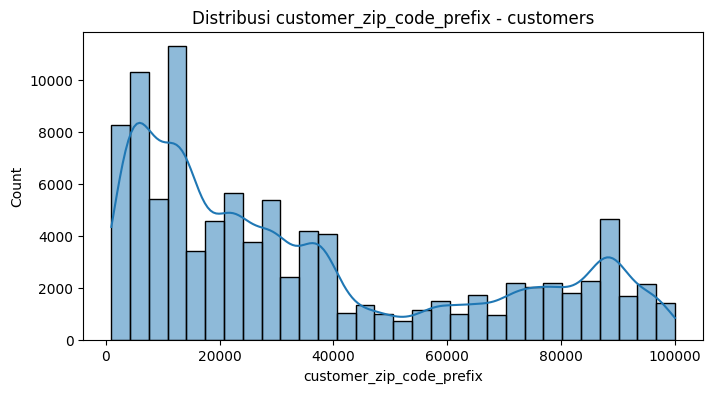

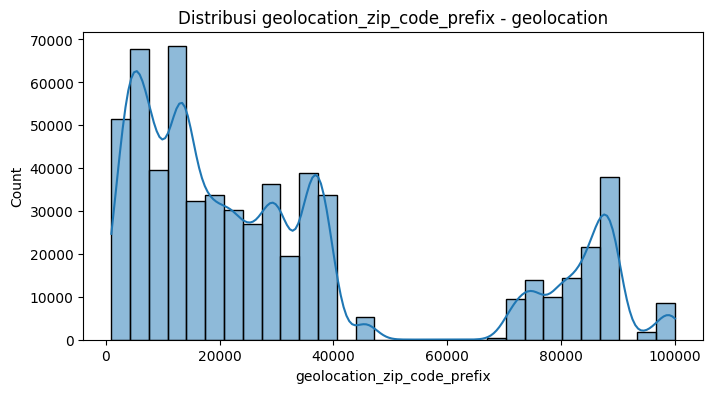

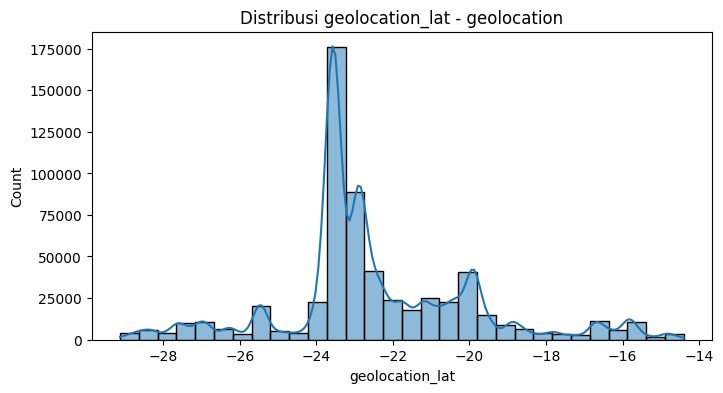

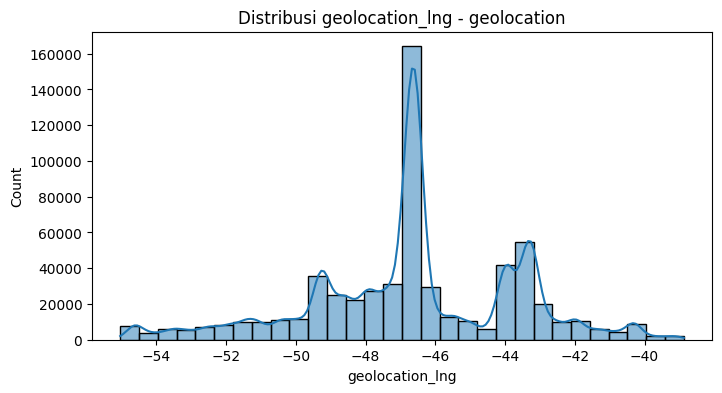

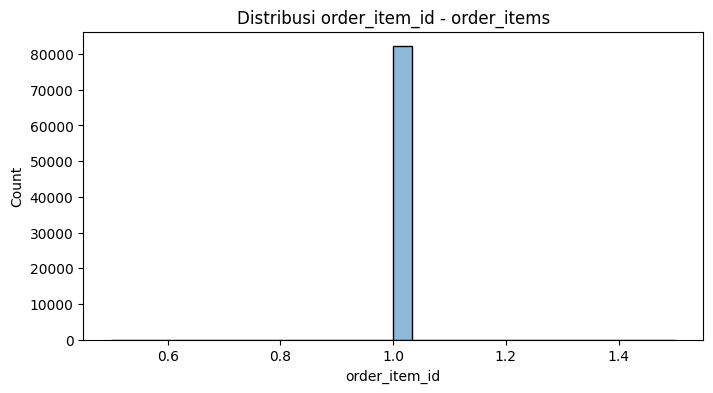

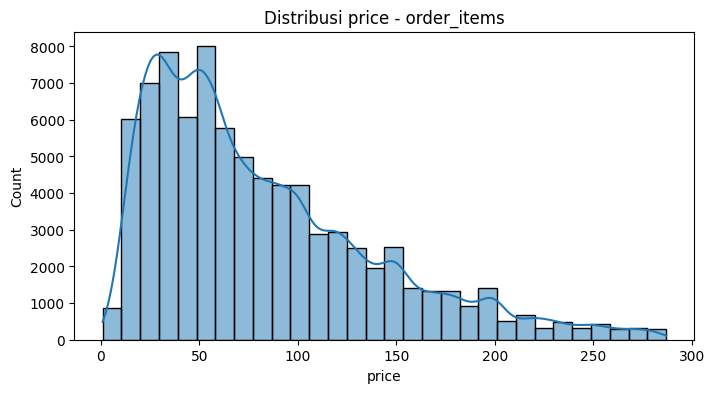

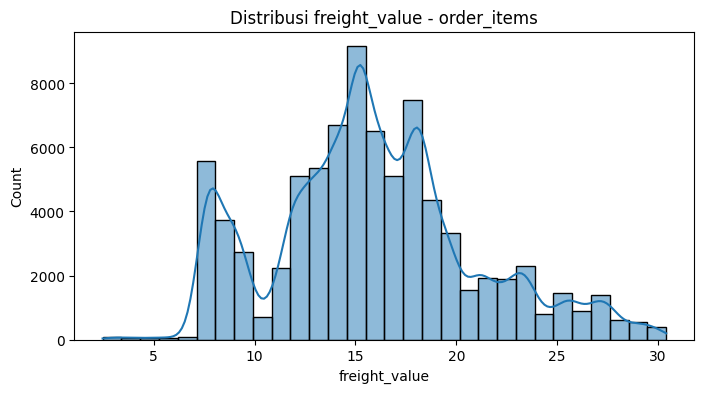

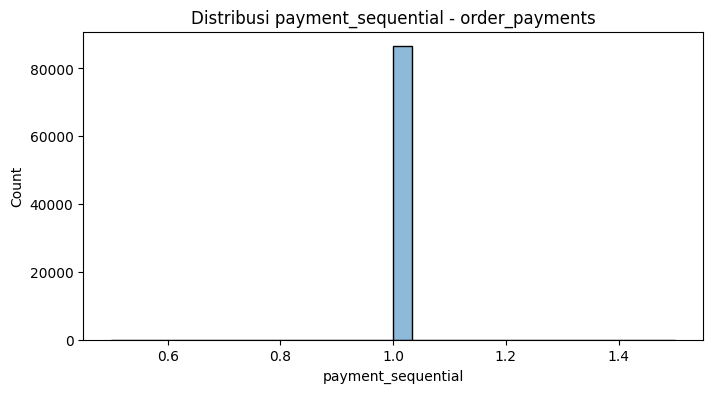

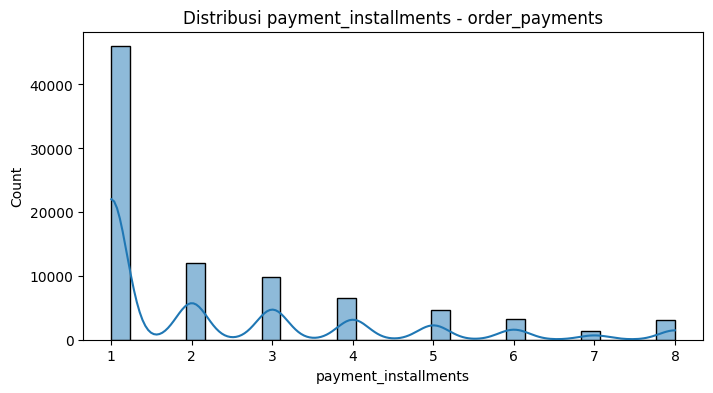

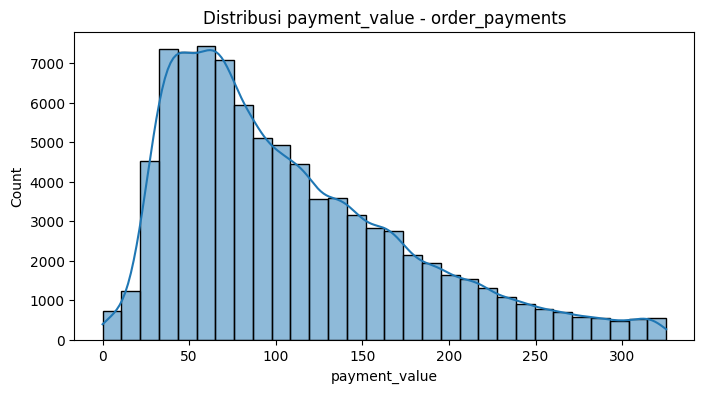

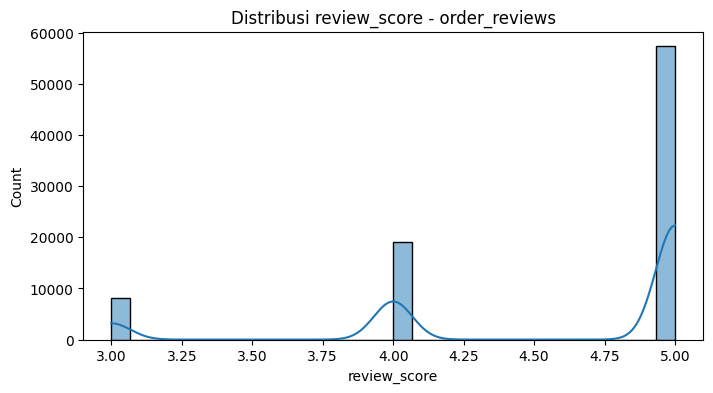

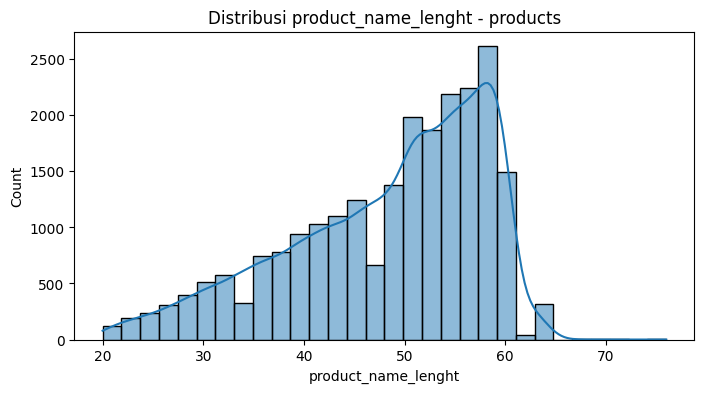

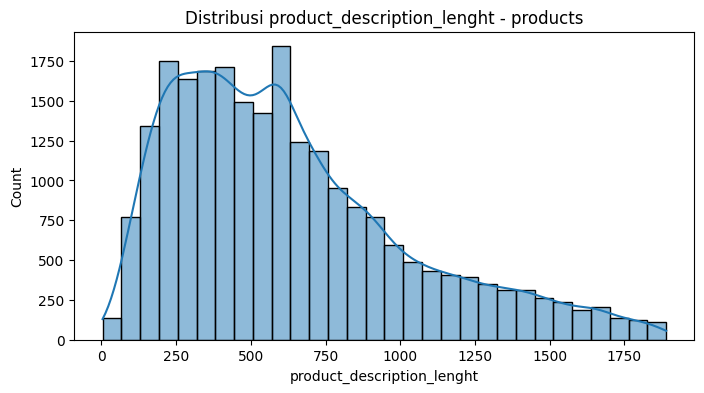

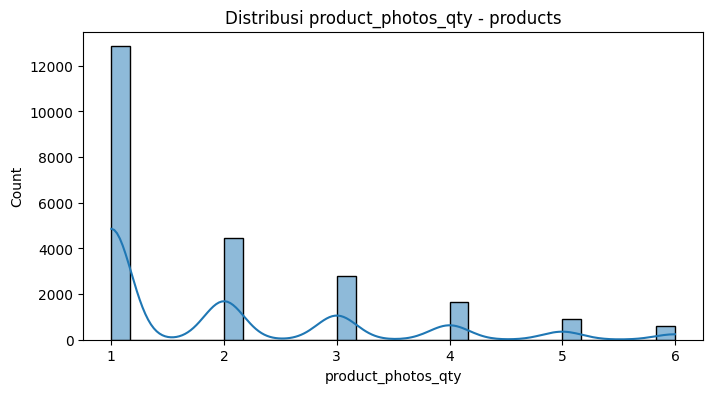

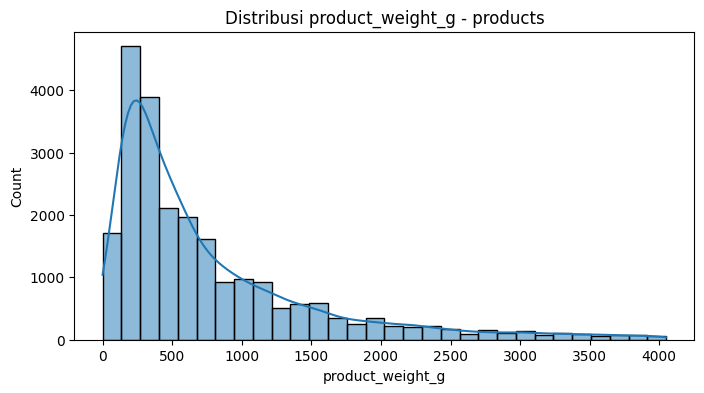

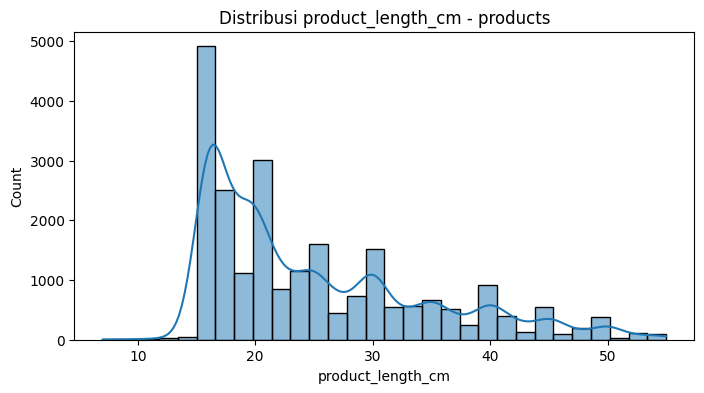

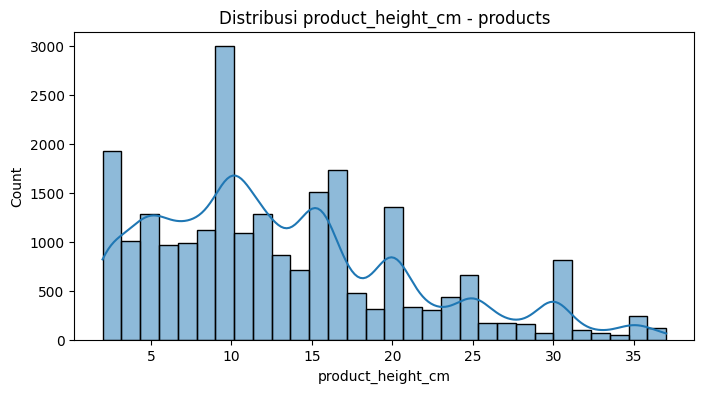

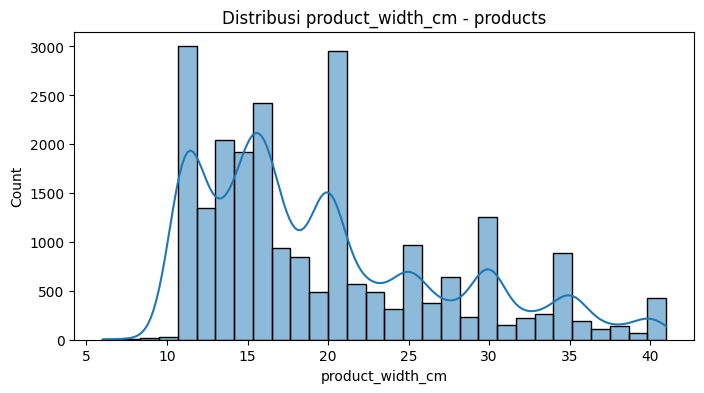

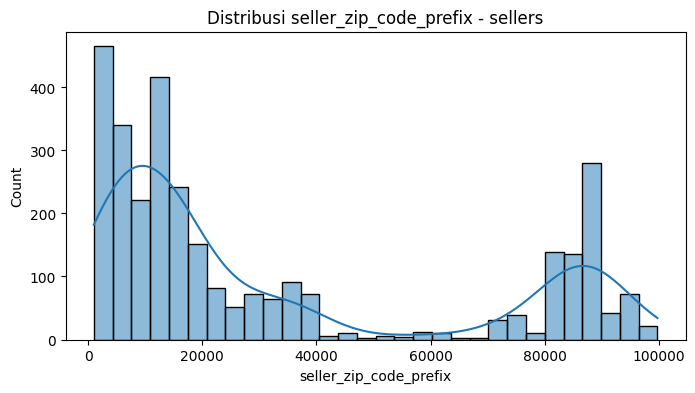

In [19]:
for name, df in cleaned_datasets.items():
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    for col in numeric_cols:
        plt.figure(figsize=(8, 4))
        sns.histplot(df[col], bins=30, kde=True)
        plt.title(f"Distribusi {col} - {name}")
        plt.show()

#### Bivariate Analysis

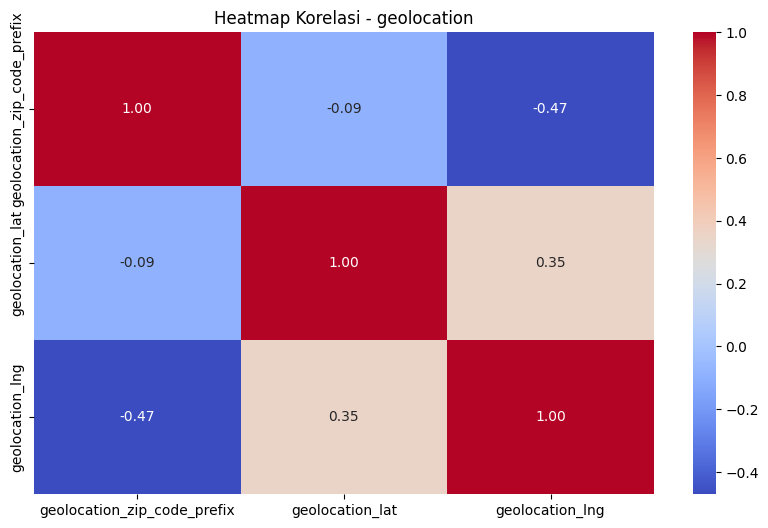

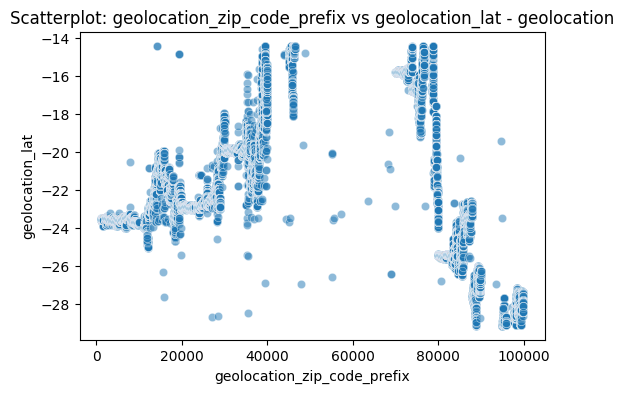

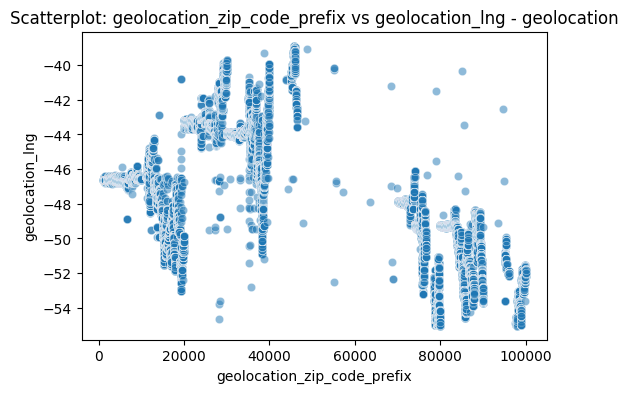

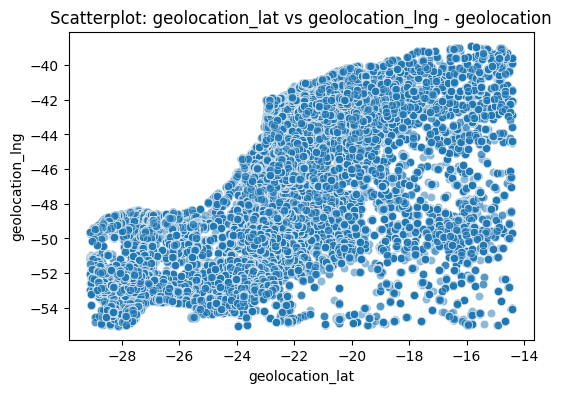

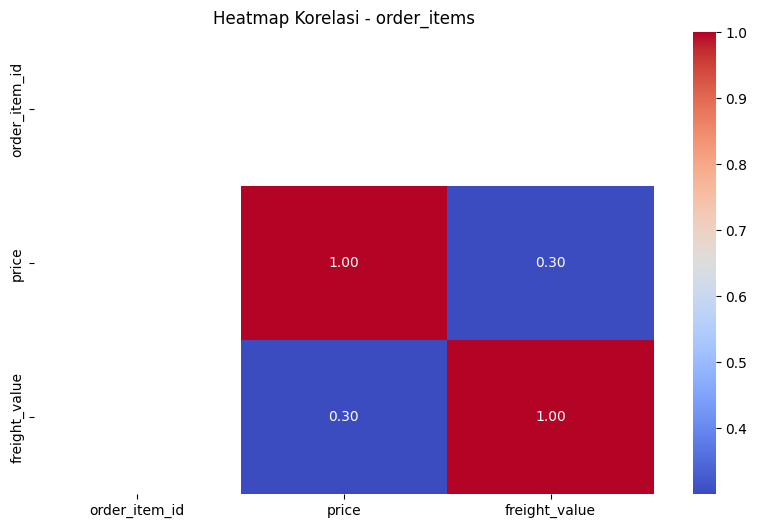

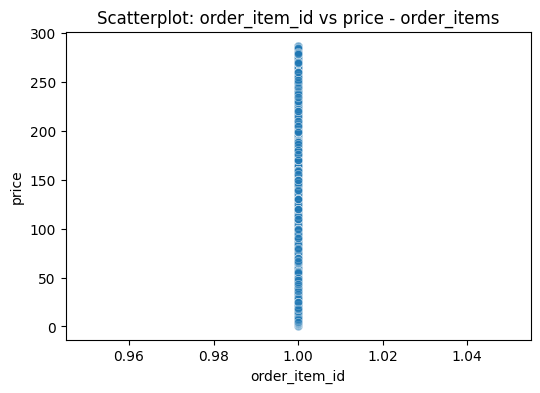

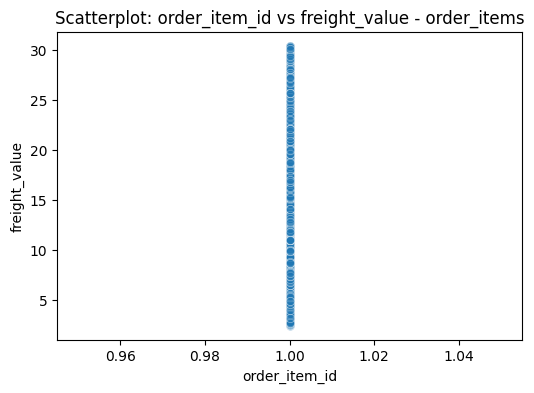

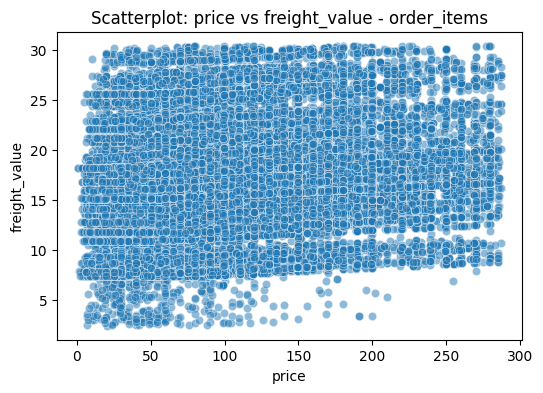

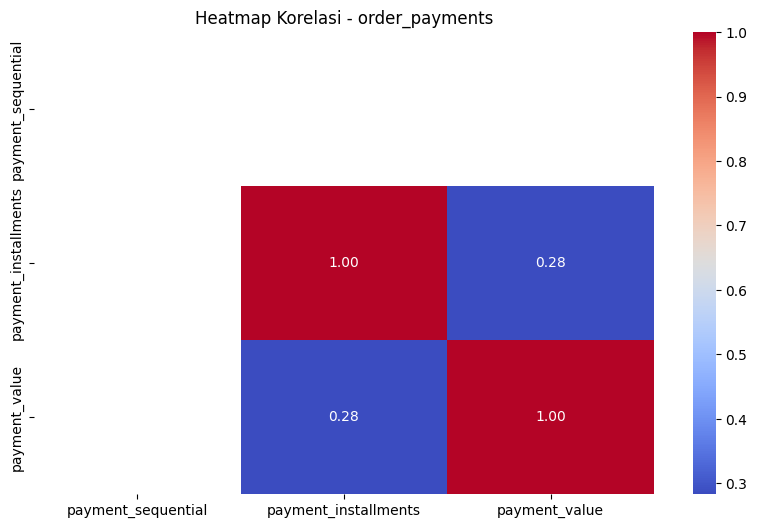

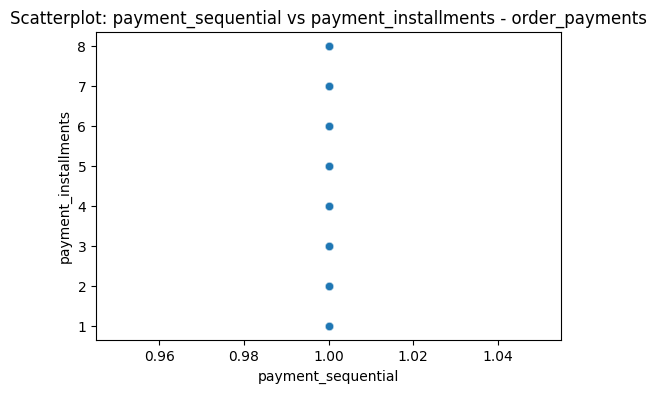

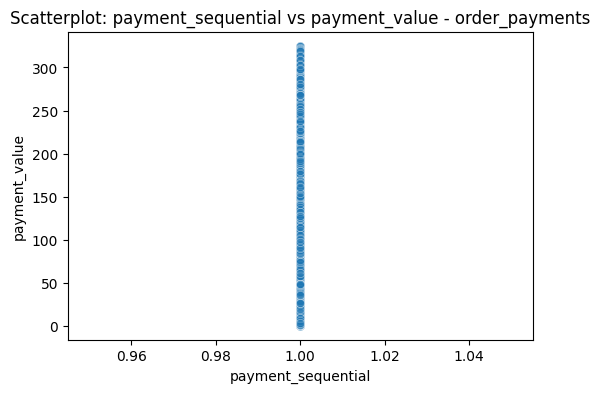

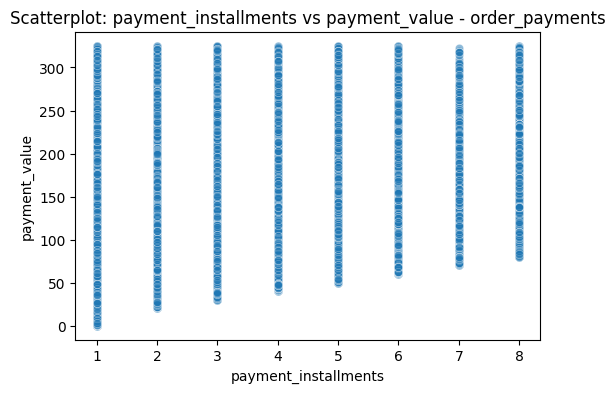

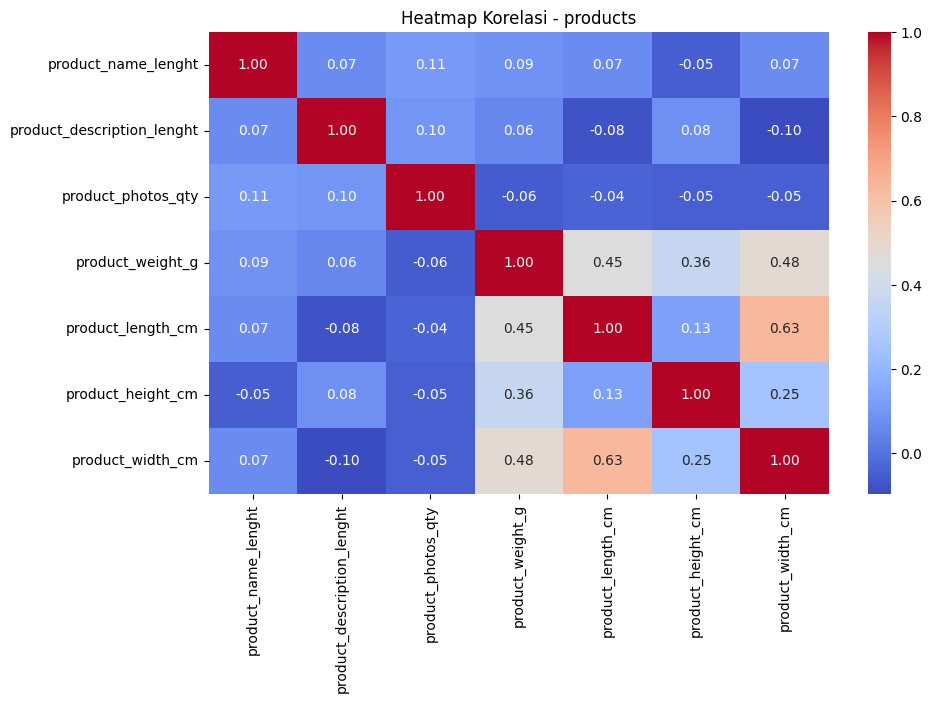

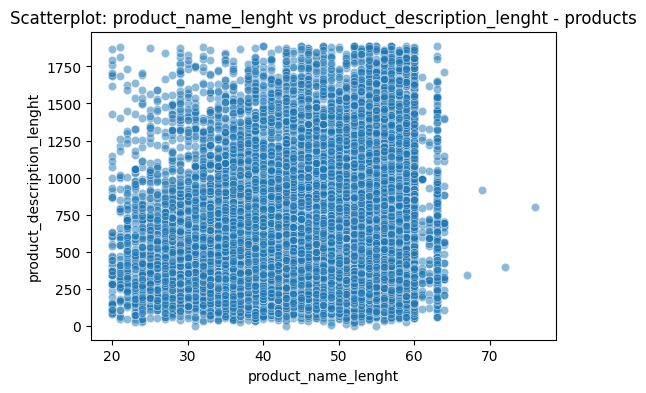

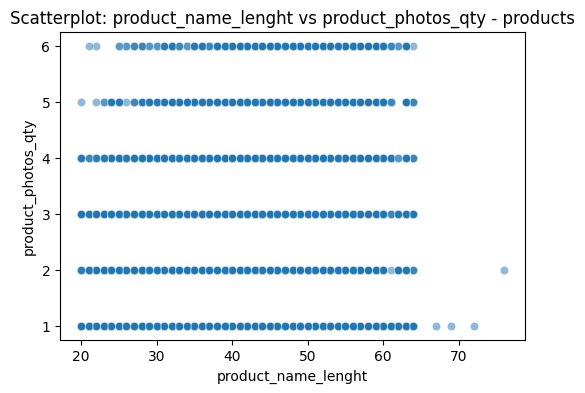

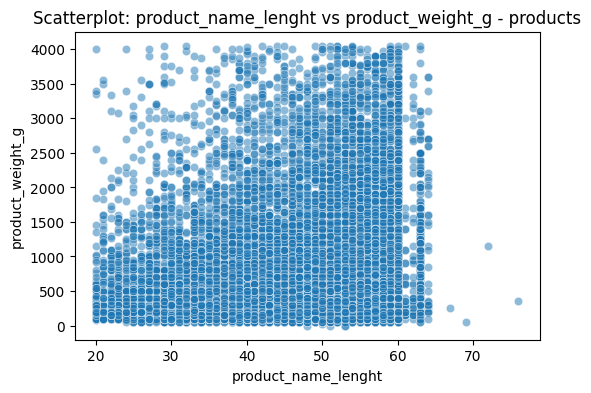

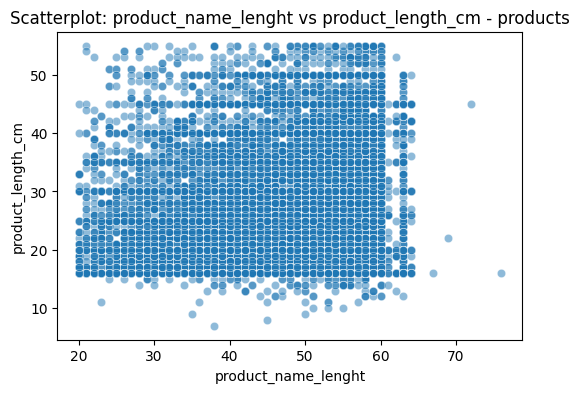

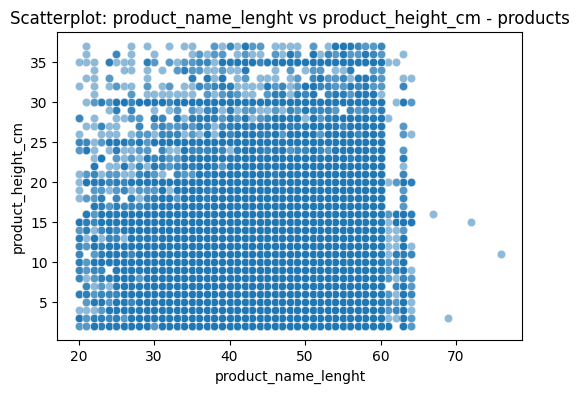

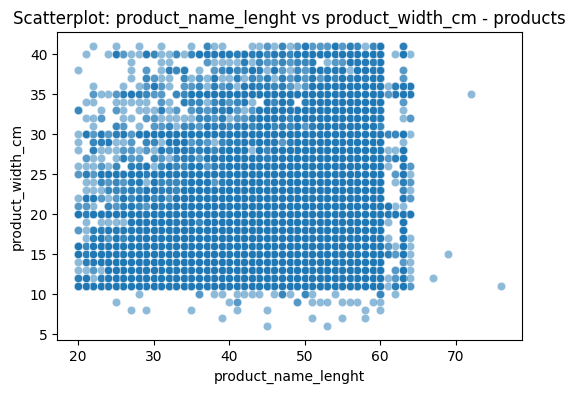

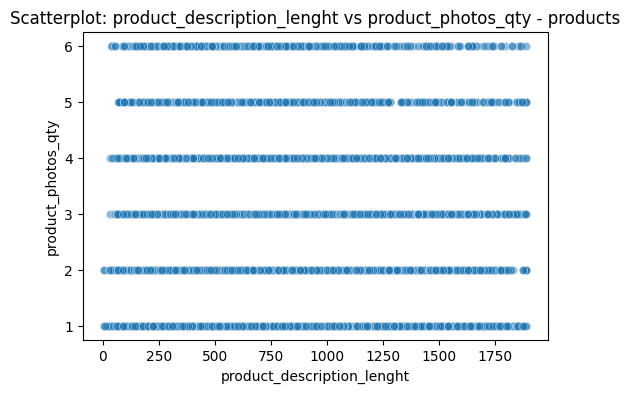

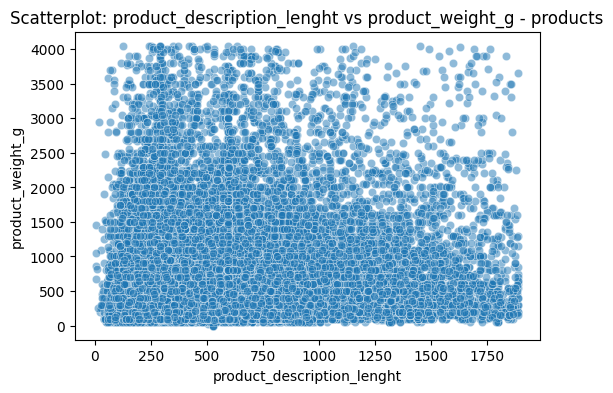

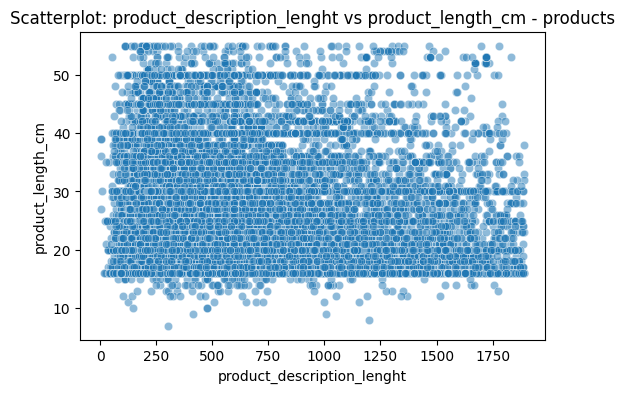

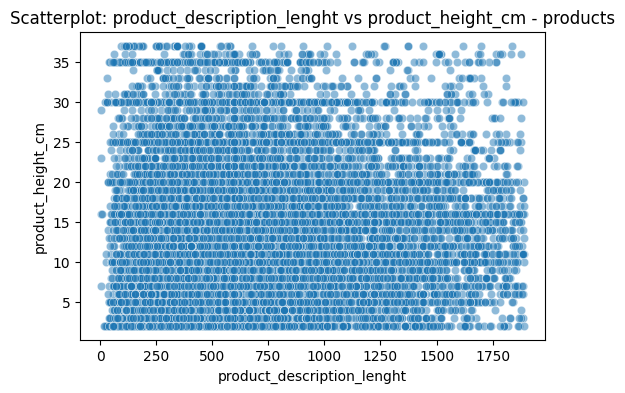

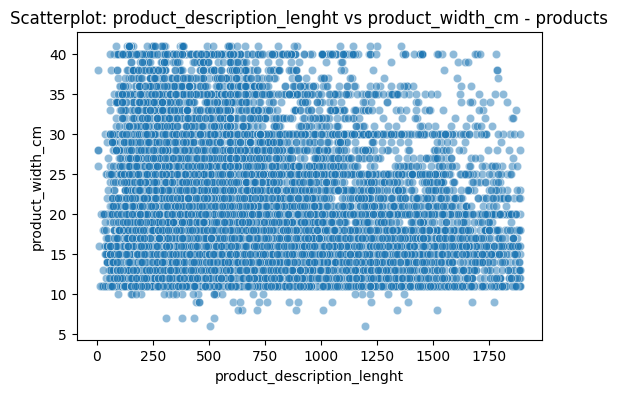

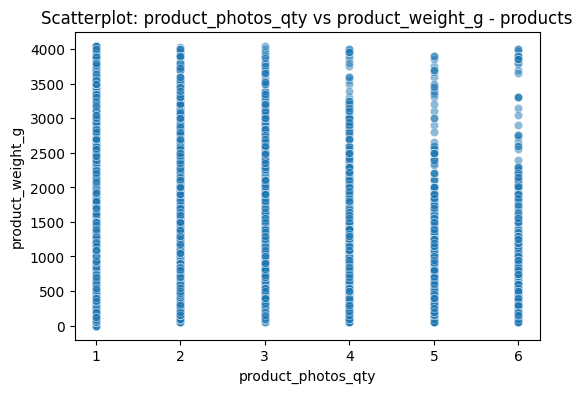

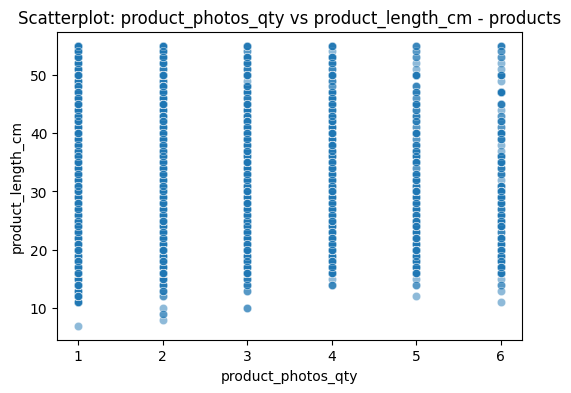

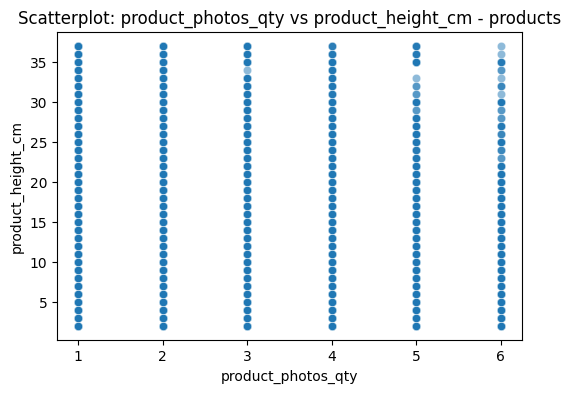

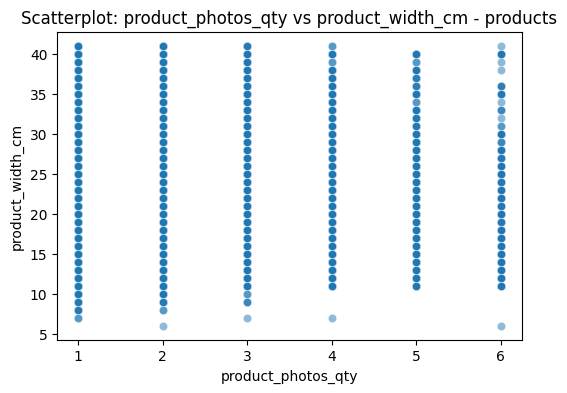

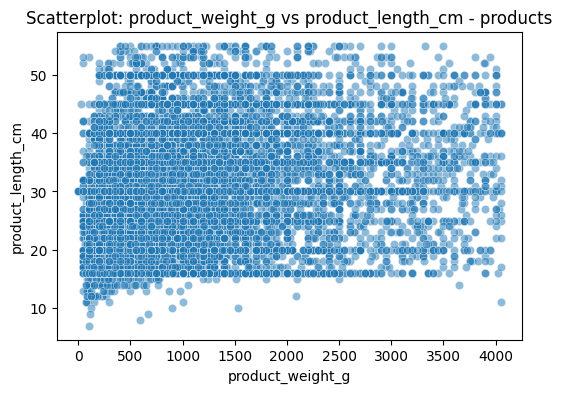

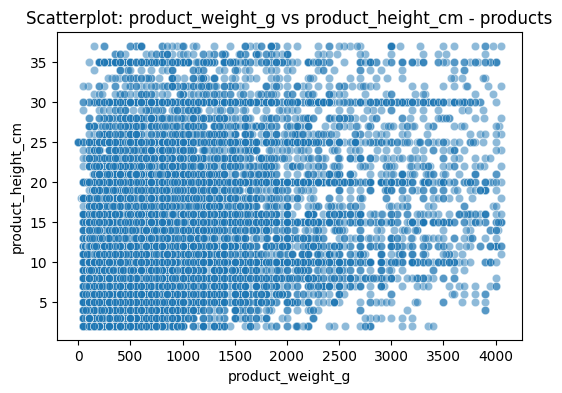

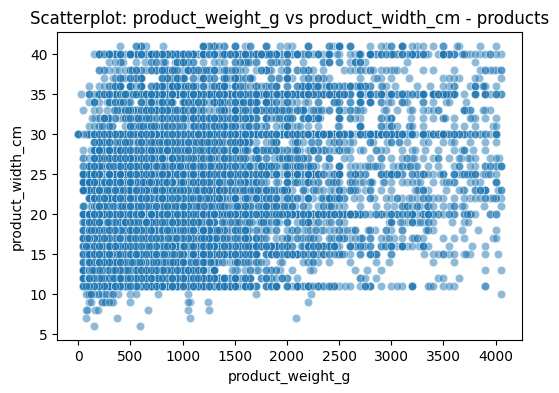

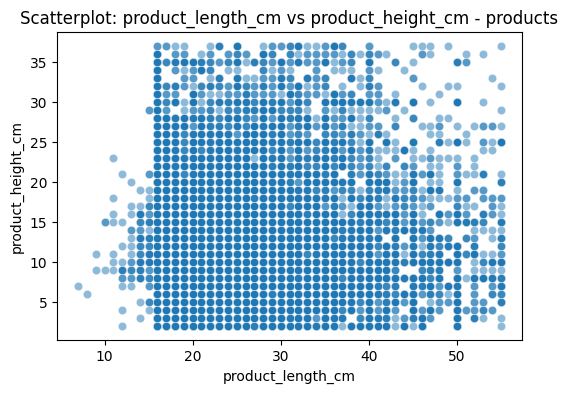

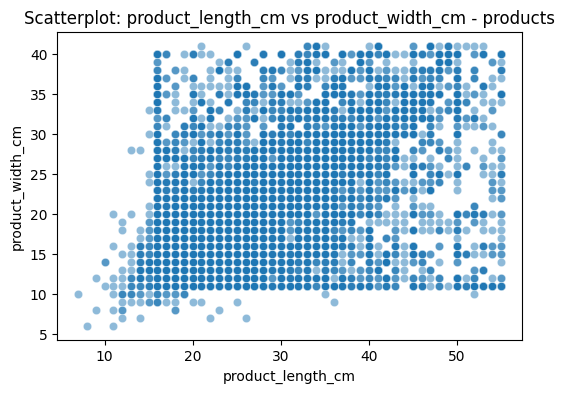

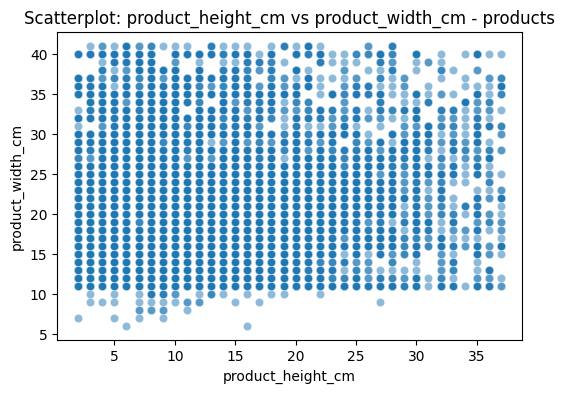

In [20]:
#Loop untuk mengkoneksikan data ke cleaned_datasets
for name, df in cleaned_datasets.items():
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    
    #Heatmap Korelasi
    if len(numeric_cols) > 1:
        plt.figure(figsize=(10, 6))
        sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
        plt.title(f"Heatmap Korelasi - {name}")
        plt.show()

    #Scatterplot antar variabel numerik
    for i in range(len(numeric_cols)):
        for j in range(i+1, len(numeric_cols)):
            plt.figure(figsize=(6, 4))
            sns.scatterplot(x=df[numeric_cols[i]], y=df[numeric_cols[j]], alpha=0.5)
            plt.title(f"Scatterplot: {numeric_cols[i]} vs {numeric_cols[j]} - {name}")
            plt.xlabel(numeric_cols[i])
            plt.ylabel(numeric_cols[j])
            plt.show()

#### Multivariate Analysis

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.02, 'Pairplot - geolocation')

<Figure size 800x600 with 0 Axes>

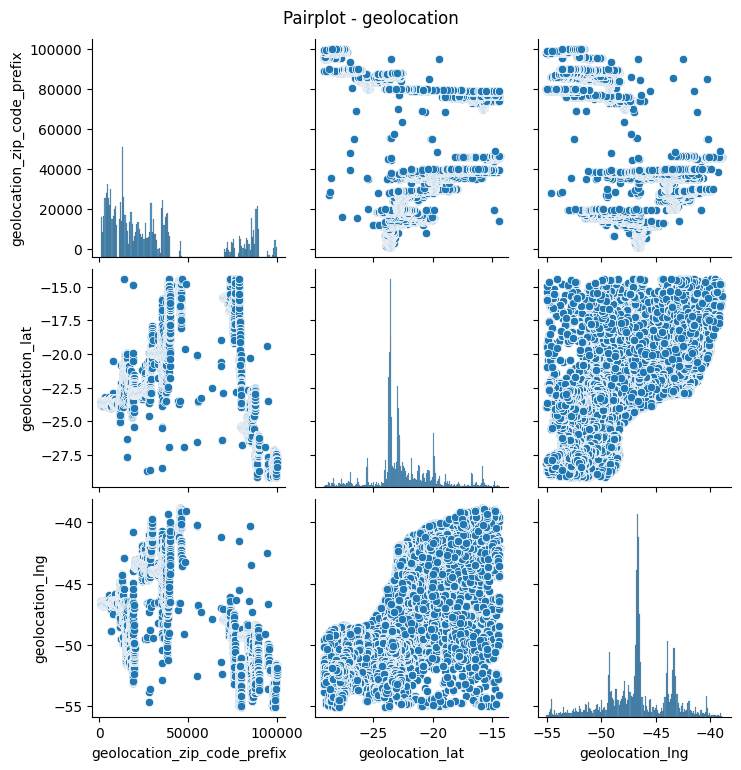

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.02, 'Pairplot - order_items')

<Figure size 800x600 with 0 Axes>

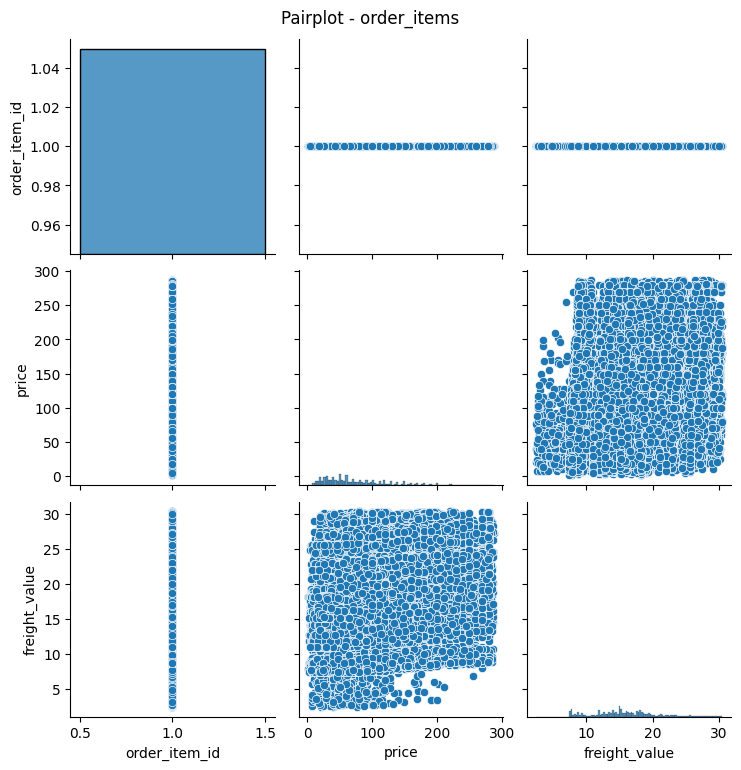

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.02, 'Pairplot - order_payments')

<Figure size 800x600 with 0 Axes>

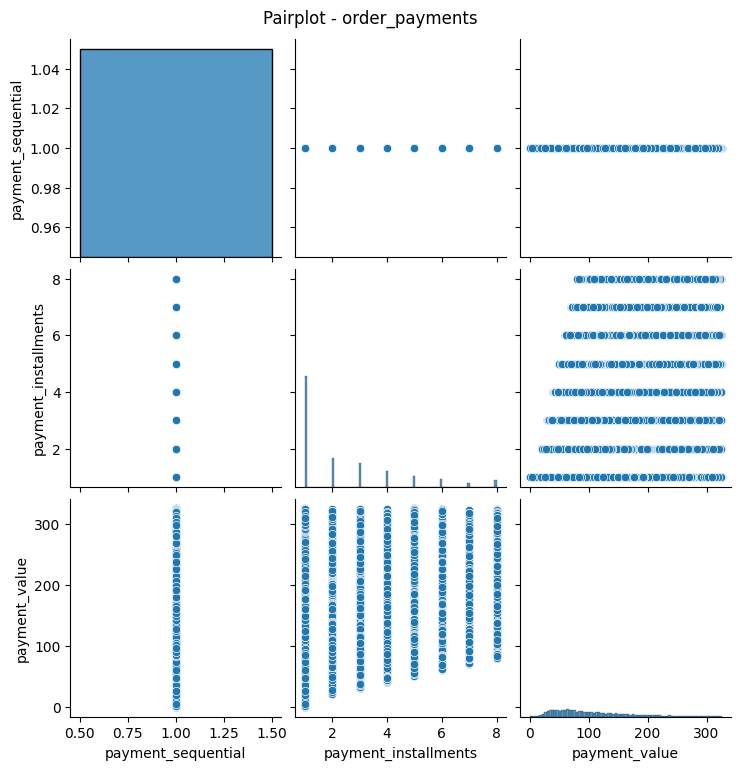

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.02, 'Pairplot - products')

<Figure size 800x600 with 0 Axes>

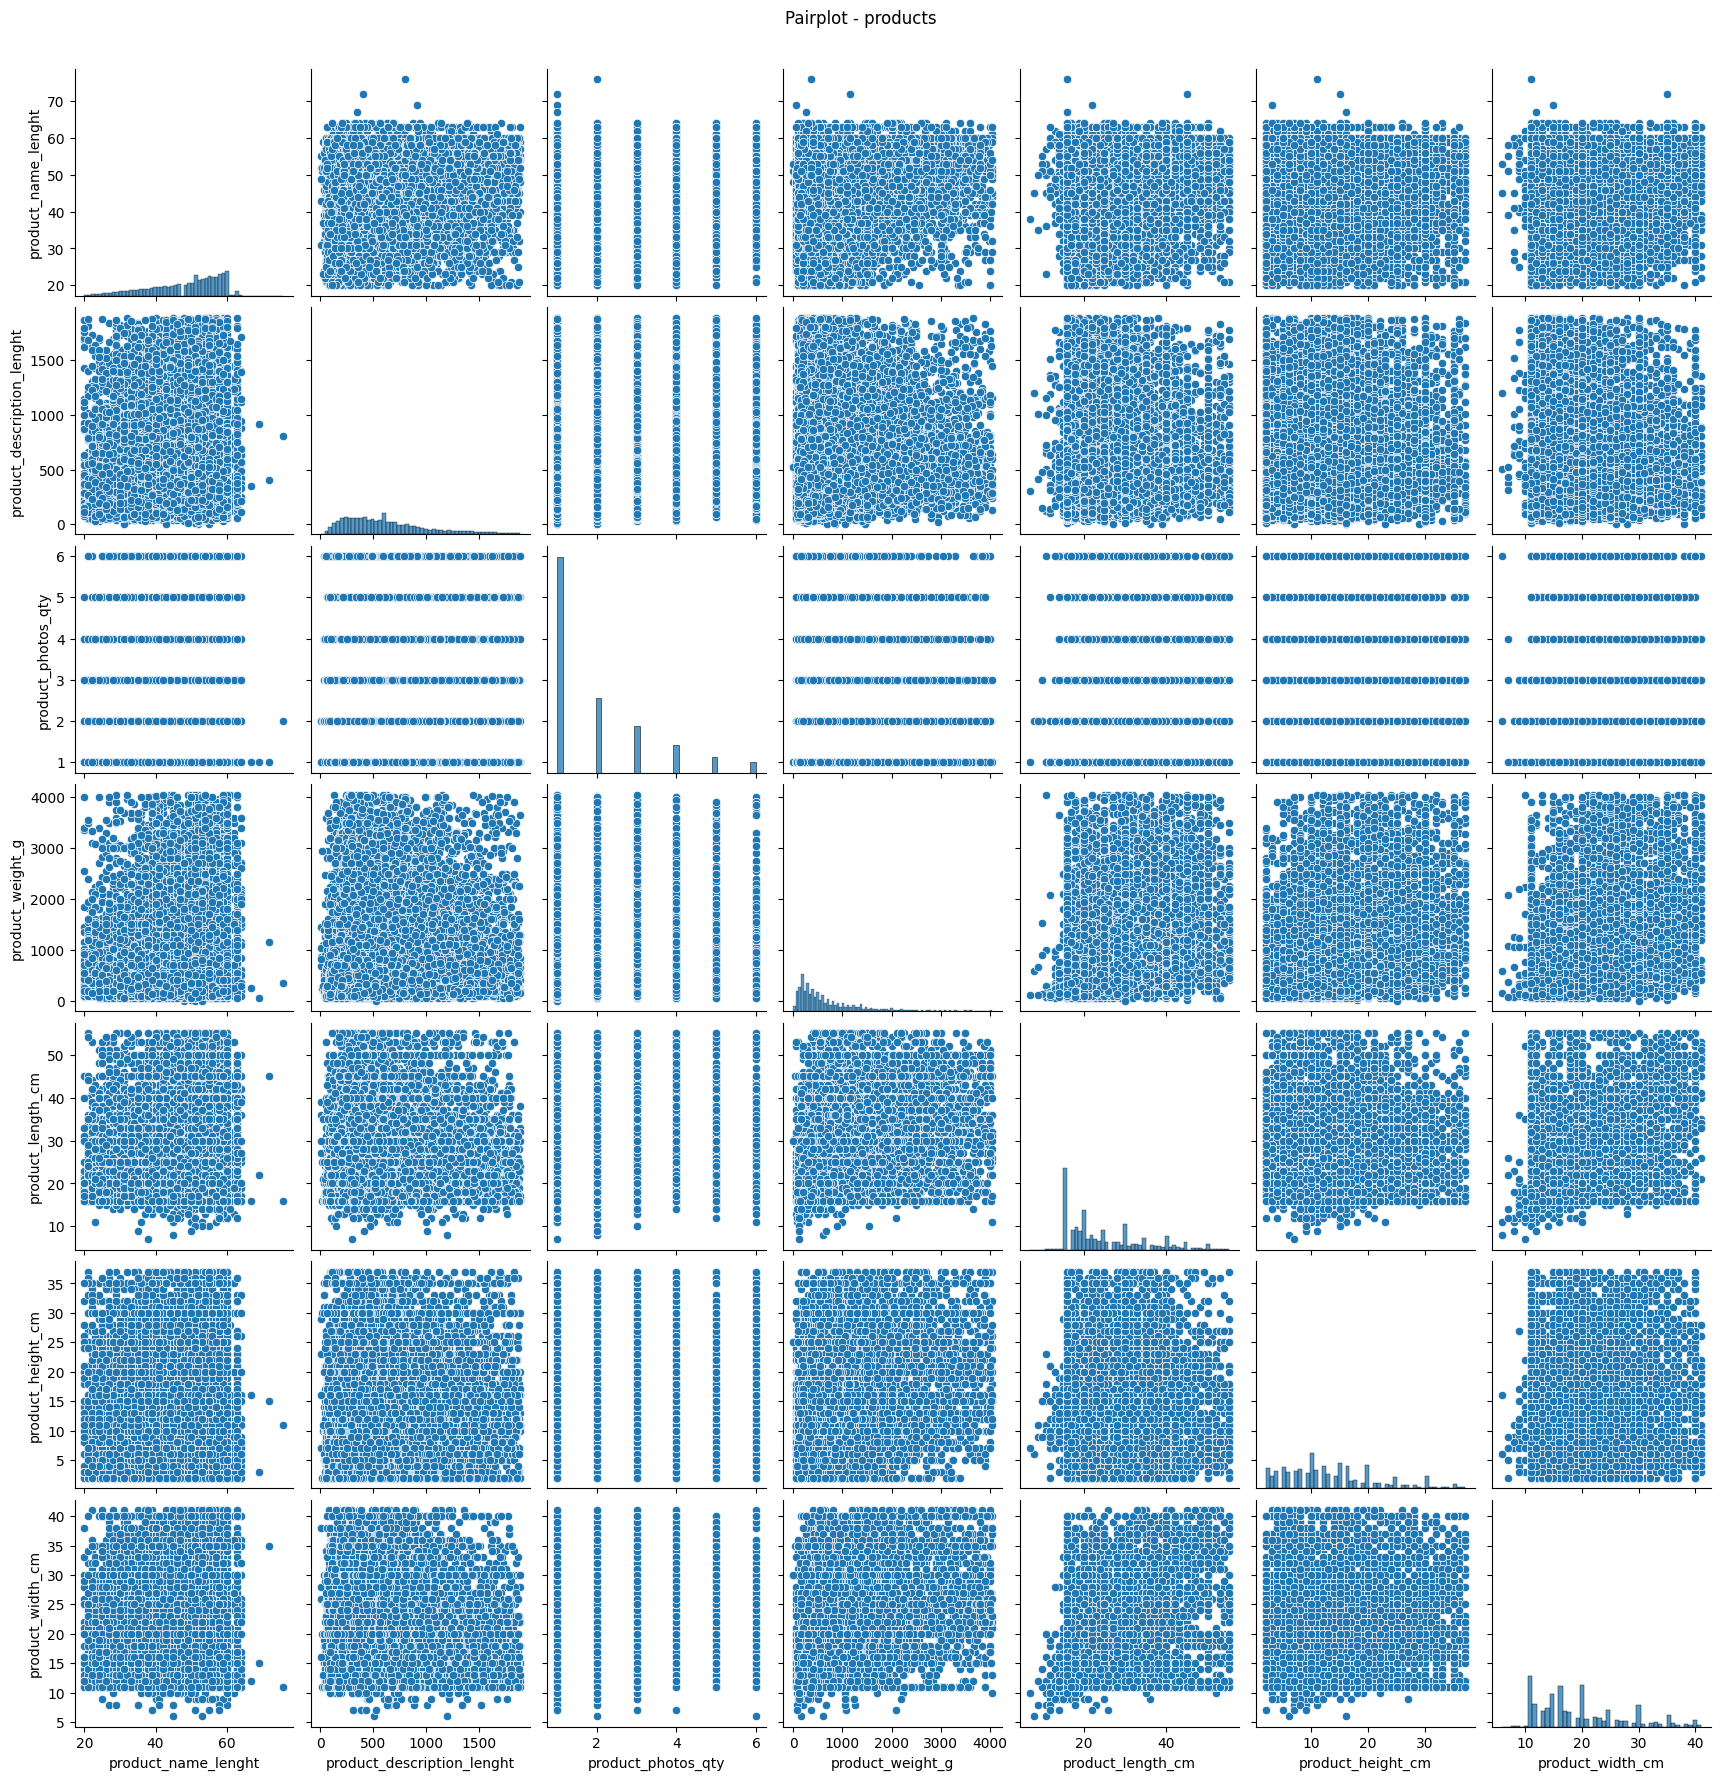

In [26]:
for name, df in cleaned_datasets.items():
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    
    #Pairplot untuk melihat hubungan antar variabel numerik
    if len(numeric_cols) > 1:
        plt.figure(figsize=(8, 6))
        sns.pairplot(df[numeric_cols])
        plt.suptitle(f"Pairplot - {name}", y=1.02)
        plt.show()

**Insight:**
- Scatterplot antara geolocation_lat dan geolocation_lng menunjukkan distribusi titik yang membentuk pola wilayah geografis.
- Hubungan antara geolocation_zip_code_prefix dan koordinat geografis (lat & lng) menunjukkan pola tertentu. Ini berarti kode pos memiliki hubungan kuat dengan lokasi geografis tertentu.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Produk apa yang paling sering dibeli pelanggan?

In [28]:
translation_df = pd.read_csv("data/product_category_name_translation.csv")

top_products = cleaned_datasets["order_items"]["product_id"].value_counts().head(10).reset_index()
top_products.columns = ["product_id", "count"]

#Penggabungan tabel produk untuk mendapatkan kategori produk
top_products = top_products.merge(cleaned_datasets["products"][["product_id", "product_category_name"]], on="product_id", how="left")

#Penggabungan dengan file terjemahan kategori
top_products = top_products.merge(translation_df, on="product_category_name", how="left")

#Menampilkan hasilnya dengan nama kategori dalam bahasa Inggris
print(top_products[["product_category_name_english", "count"]])

  product_category_name_english  count
0                bed_bath_table    424
1               furniture_decor    342
2                  garden_tools    293
3                  garden_tools    268
4                  garden_tools    263
5                 health_beauty    259
6                  garden_tools    255
7                 health_beauty    248
8                 health_beauty    218
9         computers_accessories    202


### Pertanyaan 2: Apakah ada pola pembayaran tertentu yang lebih sering digunakan pelanggan?

In [23]:
payment_counts = cleaned_datasets["order_payments"]["payment_type"].value_counts()
print(payment_counts)

payment_type
credit_card    65229
boleto         18360
voucher         1568
debit_card      1386
not_defined        3
Name: count, dtype: int64


### Pertanyaan 3: Bagaimana tren penjualan dari waktu ke waktu?

<Axes: title={'center': 'Tren Penjualan'}, xlabel='order_purchase_timestamp'>

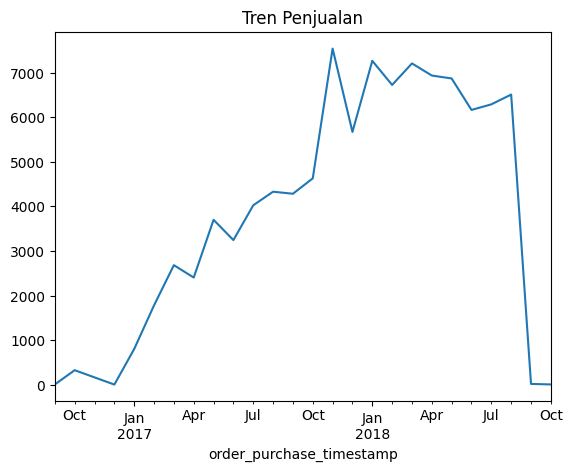

In [24]:
cleaned_datasets["orders"]["order_purchase_timestamp"] = pd.to_datetime(cleaned_datasets["orders"]["order_purchase_timestamp"])
sales_trend = cleaned_datasets["orders"].groupby(cleaned_datasets["orders"]["order_purchase_timestamp"].dt.to_period("M")).size()
sales_trend.plot(kind='line', title="Tren Penjualan")

## Conclusion

- Conclution pertanyaan 1
  - kita dapat menyimpulkan bahwa kategori produk yang paling sering dibeli pelanggan adalah sebagai berikut:
    - Garden Tools dengan total 1,079 kali pembelian (paling sering dibeli)
    - Health & Beauty dengan total 725 kali pembelian
    - Bed, Bath & Table dengan total 424 kali pembelian
    - Furniture & Decor dengan total 342 kali pembelian
    - Computers & Accessories dengan total 202 kali pembelian
- Conclution pertanyaan 2
  - Berdasarkan analisis metode pembayaran yang digunakan oleh pelanggan, terdapat pola yang jelas dalam preferensi pembayaran:
    - Credit Card dengan total 65,229 transaksi (paling dominan)
    - Boleto dengan total 18,360 transaksi
    - Voucher dengan total 1,568 transaksi
    - Debit Card dengan total 1,386 transaksi
    - Not Defined dengan total 3 transaksi
- Conclution pertanyaan 3
  - Berdasarkan grafik tren penjualan, terdapat beberapa pola yang dapat diamati:
    - Peningkatan Penjualan yang Stabil – Penjualan mengalami peningkatan signifikan sejak Oktober 2016 hingga pertengahan 2017. Hal ini menunjukkan adanya pertumbuhan pasar atau efektivitas strategi pemasaran selama periode tersebut.
    - Puncak Penjualan di Akhir 2017 & Awal 2018 – Penjualan mencapai titik tertinggi pada akhir 2017 hingga awal 2018. Ini kemungkinan disebabkan oleh musim belanja akhir tahun, seperti Black Friday, Natal, dan Tahun Baru, yang sering meningkatkan volume transaksi.
    - Fluktuasi Setelah Puncak – Setelah puncak tersebut, penjualan mulai mengalami fluktuasi dengan sedikit penurunan tetapi masih dalam tren yang cukup tinggi dibandingkan awal periode.
    - Penurunan Tajam di Akhir Data – Terlihat adanya penurunan drastis di bulan September 2018, yang kemungkinan disebabkan oleh tidak adanya data transaksi setelah periode tersebut, bukan karena faktor bisnis.

In [43]:
print(cleaned_datasets.keys())

dict_keys(['customers', 'geolocation', 'order_items', 'order_payments', 'order_reviews', 'orders', 'product_category', 'products', 'sellers'])


In [35]:
cleaned_datasets["order_items"].to_csv("order_items_cleaned.csv", index=False)

In [36]:
cleaned_datasets["customers"].to_csv("customers_cleaned.csv", index=False)

In [37]:
cleaned_datasets["geolocation"].to_csv("geolocation_cleaned.csv", index=False)

In [38]:
cleaned_datasets["order_payments"].to_csv("order_payments_cleaned.csv", index=False)

In [39]:
cleaned_datasets["order_reviews"].to_csv("order_reviews_cleaned.csv", index=False)

In [40]:
cleaned_datasets["orders"].to_csv("orders_cleaned.csv", index=False)

In [44]:
cleaned_datasets["products"].to_csv("products_cleaned.csv", index=False)

In [45]:
cleaned_datasets["product_category"].to_csv("product_category_cleaned.csv", index=False)

In [46]:
cleaned_datasets["sellers"].to_csv("sellers_cleaned.csv", index=False)